In [ ]:
!pip install pyspark

In [ ]:
# necessary imports
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, count

In [ ]:
# starting spark session
spark = SparkSession.builder.appName("HealthCareAnalysis").getOrCreate()

### Insights:
1. High risk groups: which demographic factors correlate with a higher prevalance of heart disease Target-> preventive healthcare initaitves for high risk populations.
2. Identify socio-economic factors that might influence access to healthcare or healthy lifestyles, potentially leading to higher heart disease risk.
3. Investigate how factors like physical activity, sleep patterns, smoking status, and alcohol consumption relate to heart disease risk within different demographic groups.
4. Analyze if there are variations in risk factors based on geographic location (CensusTract data).
5. Use machine learning algorithms to develop a model that predicts heart disease risk based on a combination of demographic and health data. This model can be used for early detection and intervention.
6. Analyze healthcare resource utilization (hospitals, specialists) in areas with high heart disease risk. This can help optimize resource allocation and improve preventative care accessibility.
7. Conduct geospatial analysis to map the distribution of heart diseases and demographic characteristics at a regional or local level. Identify areas with higher disease burden and demographic disparities, which can inform targeted interventions and resource allocation.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# loading data
# demographics = spark.read.csv('/content/drive/MyDrive/2017_census.csv',header=True, inferSchema=True)
df = pd.read_csv('heart_2022_no_nans.csv')

In [ ]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [ ]:
print("\nColumn Data Types:")
df.info()


Column Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCa

In [ ]:
print("Missing values per column:")
df.isnull().sum()

Missing values per column:


State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [ ]:
# Function for setting style and size of plot
def set_size_style(width, height, style=None):
    plt.figure(figsize=(width, height))
    if style != None:
        sns.set_style(style)

# Function for customizating the plot
def customize_plot(plot, title:str, xlabel:str,  ylabel:str, title_font:int, label_font:int):
    plot.set_title(title, fontsize = title_font, weight='bold')
    plot.set_xlabel(xlabel, fontsize = label_font, weight='bold')
    plot.set_ylabel(ylabel, fontsize = label_font, weight='bold')

In [ ]:
df.shape

(246022, 40)

<Axes: >

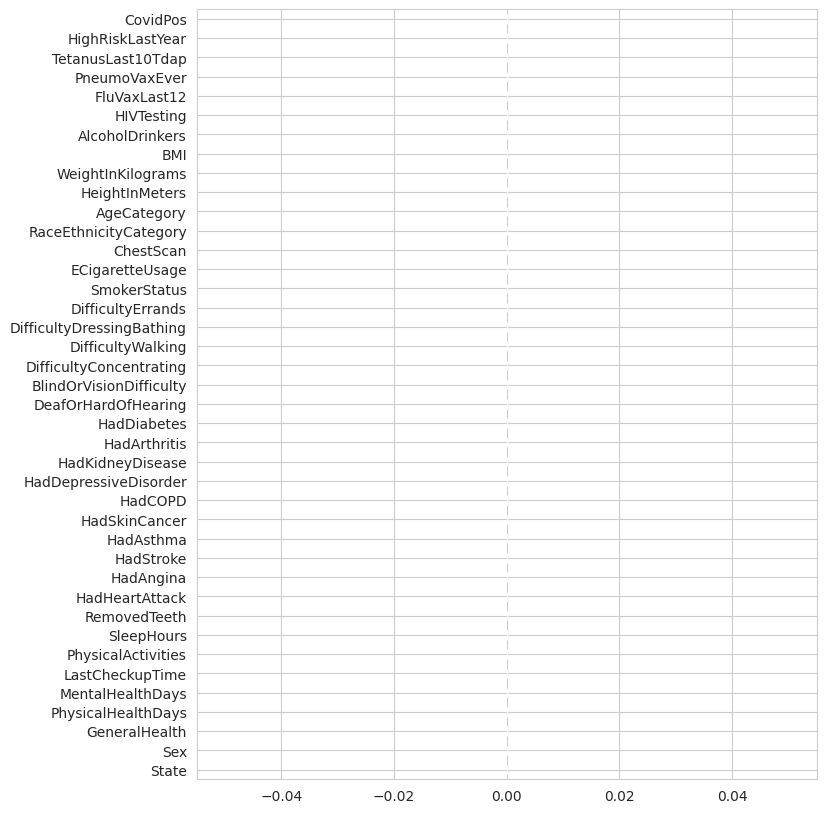

In [ ]:
set_size_style(8,10,'whitegrid')
df.isna().sum().plot(kind='barh')

In [ ]:
# Calculating percentage of null values in each column
null_values = round(df.isna().sum()/df.shape[0] * 100,2)

In [ ]:
null_values

State                        0.0
Sex                          0.0
GeneralHealth                0.0
PhysicalHealthDays           0.0
MentalHealthDays             0.0
LastCheckupTime              0.0
PhysicalActivities           0.0
SleepHours                   0.0
RemovedTeeth                 0.0
HadHeartAttack               0.0
HadAngina                    0.0
HadStroke                    0.0
HadAsthma                    0.0
HadSkinCancer                0.0
HadCOPD                      0.0
HadDepressiveDisorder        0.0
HadKidneyDisease             0.0
HadArthritis                 0.0
HadDiabetes                  0.0
DeafOrHardOfHearing          0.0
BlindOrVisionDifficulty      0.0
DifficultyConcentrating      0.0
DifficultyWalking            0.0
DifficultyDressingBathing    0.0
DifficultyErrands            0.0
SmokerStatus                 0.0
ECigaretteUsage              0.0
ChestScan                    0.0
RaceEthnicityCategory        0.0
AgeCategory                  0.0
HeightInMe

In [ ]:
df = df.drop(columns=['State', 'RemovedTeeth', 'LastCheckupTime', 'ChestScan', 'HIVTesting',
          'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear'])

df.columns

Index(['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'PhysicalActivities', 'SleepHours', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'CovidPos'],
      dtype='object')

In [ ]:
print(df.shape)
df = df.dropna( subset=['HadHeartAttack'] )
print(df.shape)

(246022, 31)
(246022, 31)


In [ ]:
df.describe(include='object')

,Sex,GeneralHealth,PhysicalActivities,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,...,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,CovidPos
count,246022,246022,246022,246022,246022,246022,246022,246022,246022,246022,...,246022,246022,246022,246022,246022,246022,246022,246022,246022,246022
unique,2,5,2,2,2,2,2,2,2,2,...,2,2,2,2,4,4,5,13,2,3
top,Female,Very good,Yes,No,No,No,No,No,No,No,...,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,"White only, Non-Hispanic",Age 65 to 69,Yes,No
freq,127811,86999,191318,232587,231069,235910,209493,225001,227028,195402,...,219802,209952,237682,229638,147737,190128,186336,28557,135307,167306


In [ ]:
for col in df.describe(include='object').columns:
    print('Column Name: ',col)
    print(df[col].unique())
    print('-'*50)

Column Name:  Sex
['Female' 'Male']
--------------------------------------------------
Column Name:  GeneralHealth
['Very good' 'Fair' 'Good' 'Excellent' 'Poor']
--------------------------------------------------
Column Name:  PhysicalActivities
['Yes' 'No']
--------------------------------------------------
Column Name:  HadHeartAttack
['No' 'Yes']
--------------------------------------------------
Column Name:  HadAngina
['No' 'Yes']
--------------------------------------------------
Column Name:  HadStroke
['No' 'Yes']
--------------------------------------------------
Column Name:  HadAsthma
['No' 'Yes']
--------------------------------------------------
Column Name:  HadSkinCancer
['No' 'Yes']
--------------------------------------------------
Column Name:  HadCOPD
['No' 'Yes']
--------------------------------------------------
Column Name:  HadDepressiveDisorder
['No' 'Yes']
--------------------------------------------------
Column Name:  HadKidneyDisease
['No' 'Yes']
-----------

In [ ]:
df['HadDiabetes'].replace({'No, pre-diabetes or borderline diabetes' : 'Borderline', 'Yes, but only during pregnancy (female)' : 'During Pregnancy'} , inplace=True)

df['HadDiabetes'].unique()

array(['No', 'Yes', 'During Pregnancy', 'Borderline'], dtype=object)

In [ ]:
df['SmokerStatus'].replace({'Current smoker - now smokes some days' : 'Current smoker(Some days)',
                                    'Current smoker - now smokes every day' : 'Current smoker(Every day)'}, inplace=True)

df['SmokerStatus'].unique()

array(['Former smoker', 'Never smoked', 'Current smoker(Every day)',
       'Current smoker(Some days)'], dtype=object)

In [ ]:
df['ECigaretteUsage'].replace({'Not at all (right now)' : 'Not at all',
                                        'Never used e-cigarettes in my entire life' : 'Never',
                                        'Use them every day' : 'Everyday',
                                        'Use them some days' : 'Somedays'}, inplace=True)

df['ECigaretteUsage'].unique()

array(['Never', 'Somedays', 'Not at all', 'Everyday'], dtype=object)

In [ ]:
df['RaceEthnicityCategory'].replace({'White only, Non-Hispanic' : 'White',
                                             'Black only, Non-Hispanic' : 'Black',
                                             'Other race only, Non-Hispanic' : 'Other Race',
                                             'Multiracial, Non-Hispanic' : 'Multi Racial'}, inplace=True)

df['RaceEthnicityCategory'].unique()

array(['White', 'Black', 'Other Race', 'Multi Racial', 'Hispanic'],
      dtype=object)

In [ ]:
df['CovidPos'].replace({'Tested positive using home test without a health professional' : 'Yes'}, inplace=True)

df['CovidPos'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# Dropping Duplicate Rows
df[df.duplicated()]
df.drop_duplicates(inplace=True)

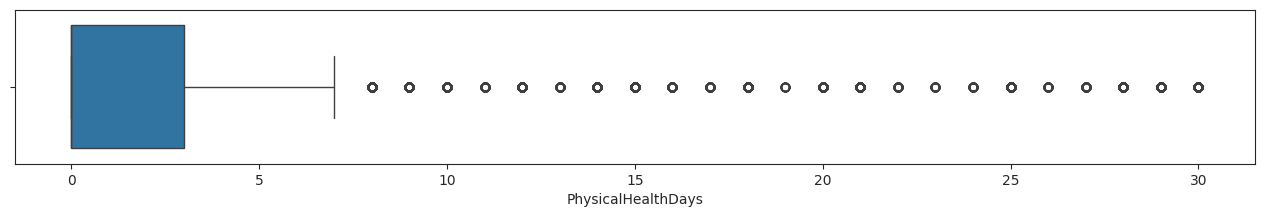

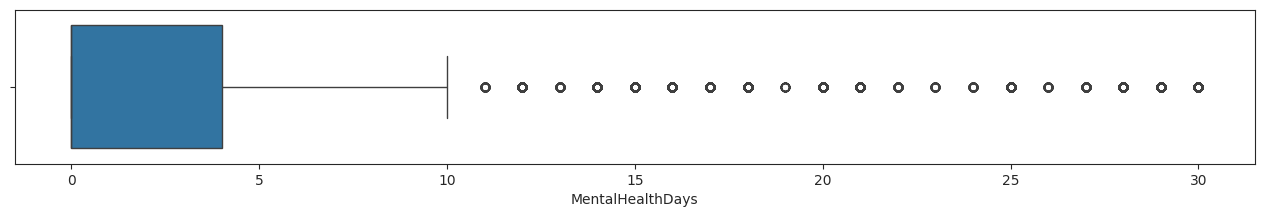

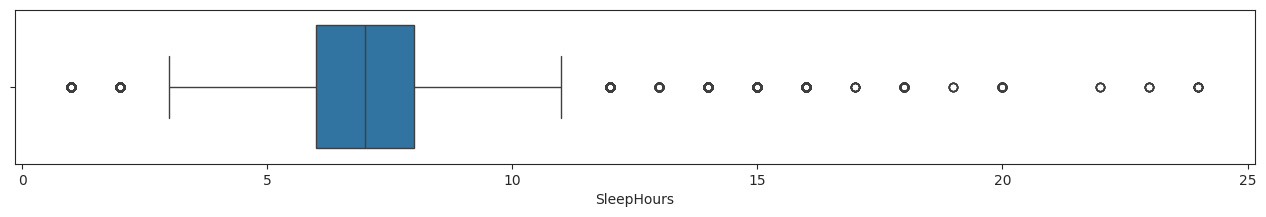

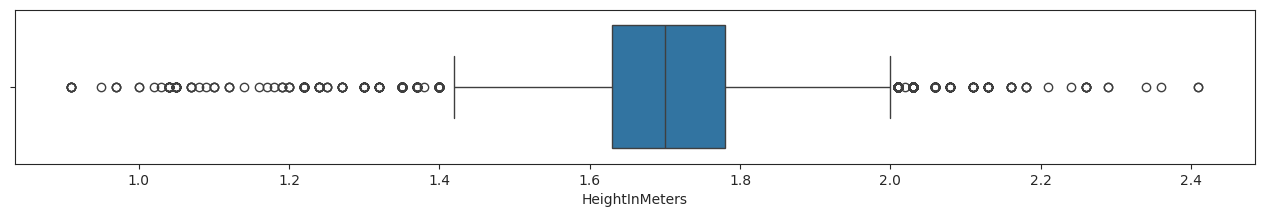

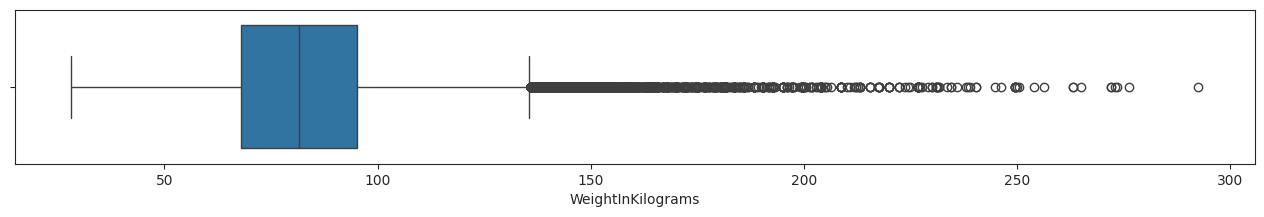

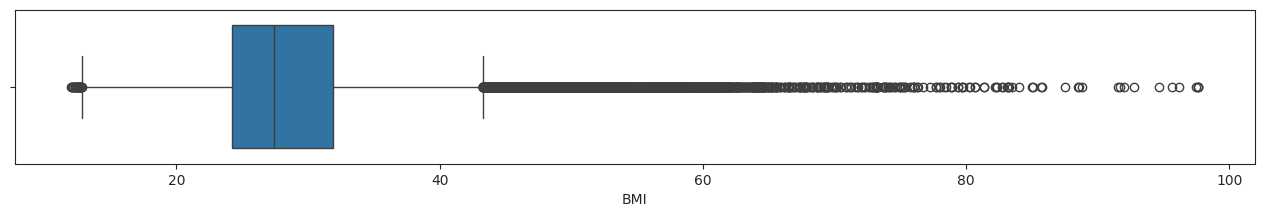

In [ ]:
for col in df.describe().columns:
    set_size_style(16,2,'ticks')
    sns.boxplot(data=df, x=col)
    plt.show()

In [ ]:
# Function for extracting outliers in column of dataframe
def get_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1

    lower_limit = Q1 - (IQR * 1.5)
    upper_limit = Q3 + (IQR * 1.5)

    outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]

    return outliers, lower_limit, upper_limit

In [ ]:
sleep_hours_outliers, lower_sleep, upper_sleep = get_outliers(df, 'SleepHours')
sleep_hours_outliers

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,DifficultyErrands,SmokerStatus,ECigaretteUsage,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,CovidPos
77,Female,Fair,5.0,0.0,Yes,12.0,Yes,No,No,No,...,No,Never smoked,Never,Black,Age 60 to 64,1.60,113.40,44.29,No,No
96,Female,Very good,5.0,0.0,Yes,12.0,Yes,No,Yes,Yes,...,No,Never smoked,Never,Black,Age 70 to 74,1.68,101.60,36.15,No,No
114,Female,Poor,30.0,15.0,No,12.0,No,No,Yes,No,...,No,Former smoker,Never,White,Age 65 to 69,1.80,113.40,34.87,No,No
133,Female,Poor,30.0,10.0,No,18.0,No,No,No,No,...,Yes,Former smoker,Never,White,Age 80 or older,1.70,93.89,32.42,No,No
260,Female,Good,3.0,0.0,Yes,12.0,No,No,No,No,...,No,Never smoked,Never,Black,Age 55 to 59,1.60,121.56,47.47,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245849,Female,Poor,10.0,10.0,Yes,12.0,No,No,No,No,...,No,Never smoked,Never,Black,Age 70 to 74,1.73,68.04,22.81,No,No
245914,Female,Excellent,10.0,10.0,Yes,1.0,No,No,No,No,...,No,Never smoked,Not at all,Hispanic,Age 30 to 34,1.65,46.27,16.97,No,No
245932,Male,Very good,0.0,0.0,Yes,12.0,No,No,No,No,...,No,Never smoked,Never,Black,Age 60 to 64,1.75,84.82,27.61,No,No
245936,Female,Fair,2.0,1.0,Yes,18.0,No,No,No,No,...,Yes,Never smoked,Never,Black,Age 60 to 64,1.65,99.79,36.61,Yes,No


In [ ]:
print(f"Lower Limit(SleepHours):{lower_sleep})\nUpper Limit(SleepHours):{upper_sleep})")

Lower Limit(SleepHours):3.0)
Upper Limit(SleepHours):11.0)


In [ ]:
# Dropping records with sleep less than 3 hours
df = df.drop(df[df['SleepHours'] < lower_sleep].index)
df.reset_index(drop=True, inplace=True)
df.shape

(243188, 31)

In [ ]:
# Dropping records with sleep greater than 13 hours
df = df.drop(df[df['SleepHours'] > 13].index)
df.reset_index(drop=True, inplace=True)
df.shape

(242558, 31)

<Axes: xlabel='SleepHours'>

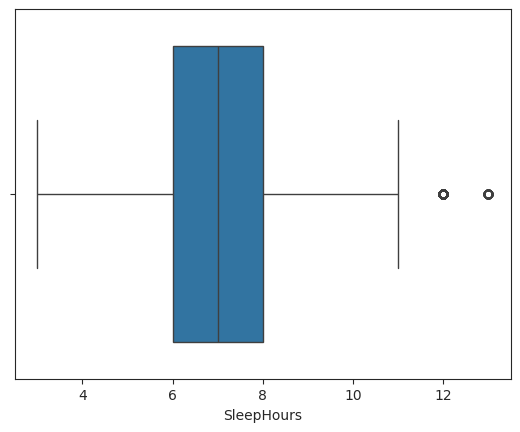

In [ ]:
sns.boxplot(data=df, x='SleepHours')

In [ ]:
height_outliers, lower_height, upper_height = get_outliers(df, 'HeightInMeters')
print(f"Lower Limit(Height):{lower_height})\nUpper Limit(Height):{upper_height})")
df.shape

Lower Limit(Height):1.4049999999999998)
Upper Limit(Height):2.0050000000000003)


(242558, 31)

In [ ]:
# Dropping records with height less than 1.3 meters
df = df.drop(df[df['HeightInMeters'] < 1.3].index)
df.reset_index(drop=True, inplace=True)
# Dropping records with height greater than 2.1 meters
df = df.drop(df[df['HeightInMeters'] > 2.1].index)
df.reset_index(drop=True, inplace=True)
df.shape

(242390, 31)

<Axes: xlabel='HeightInMeters'>

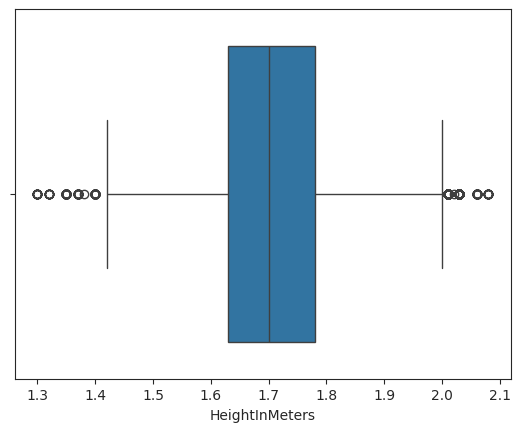

In [ ]:
sns.boxplot(data=df, x='HeightInMeters')

In [ ]:
weight_outliers, lower_weight, upper_weight = get_outliers(df, 'WeightInKilograms')

# Dropping records with weight less than 40 kg
df = df.drop(df[df['WeightInKilograms'] < 40].index)
df.reset_index(drop=True, inplace=True)

# Dropping records with weight greater than 200 kg
df = df.drop(df[df['WeightInKilograms'] > 200].index)
df.reset_index(drop=True, inplace=True)
df.shape

(242034, 31)

<Axes: xlabel='WeightInKilograms'>

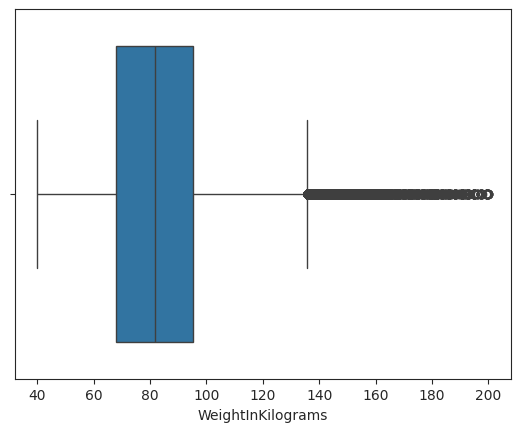

In [ ]:
sns.boxplot(data=df, x='WeightInKilograms')

In [ ]:
gender_count = df['Sex'].value_counts()
gender_count

Sex
Female    125847
Male      116187
Name: count, dtype: int64

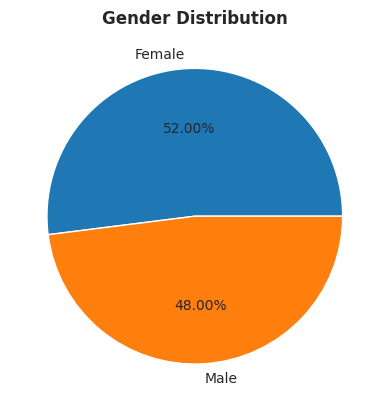

In [ ]:
plt.title("Gender Distribution", fontsize = 12, weight='bold')
plt.pie(gender_count,labels=gender_count.index,radius=1, autopct='%.2f%%')
plt.show()

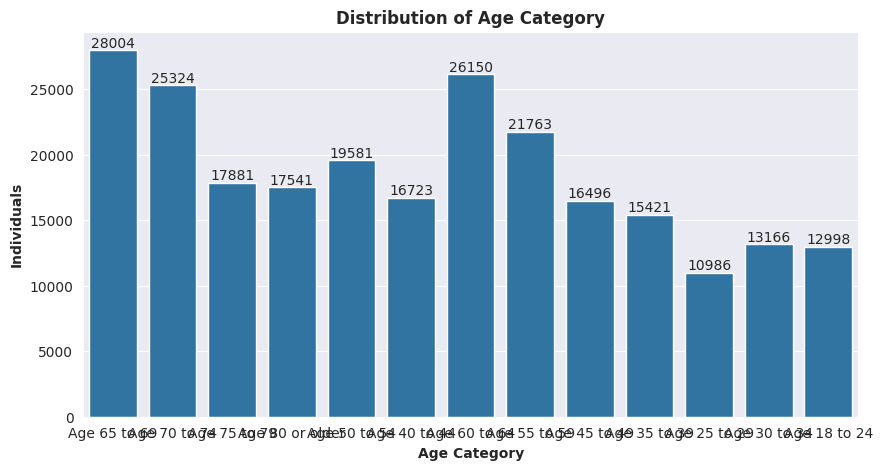

In [ ]:
set_size_style(10,5,'darkgrid')
ax = sns.countplot(data = df, x = 'AgeCategory')
customize_plot(ax,"Distribution of Age Category","Age Category","Individuals",12,10)
for c in ax.containers:
    ax.bar_label(c)

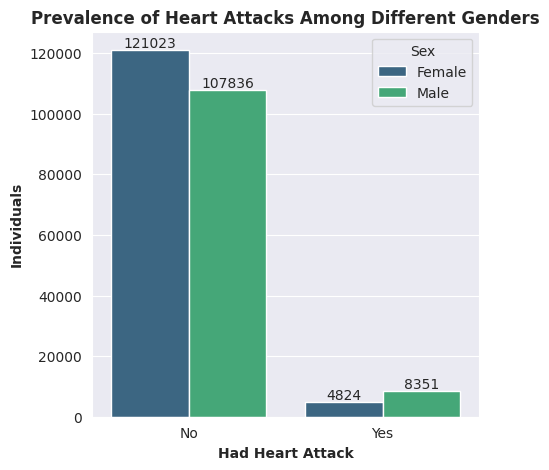

In [ ]:
set_size_style(5,5,'darkgrid')
ax = sns.countplot(data = df, x = 'HadHeartAttack', hue = 'Sex', palette='viridis')
customize_plot(ax,"Prevalence of Heart Attacks Among Different Genders","Had Heart Attack","Individuals",12,10)
for c in ax.containers:
    ax.bar_label(c)

In [ ]:
df['HadObesity'] = df['BMI'].apply(lambda x: 'Yes' if x >=30 else 'No')

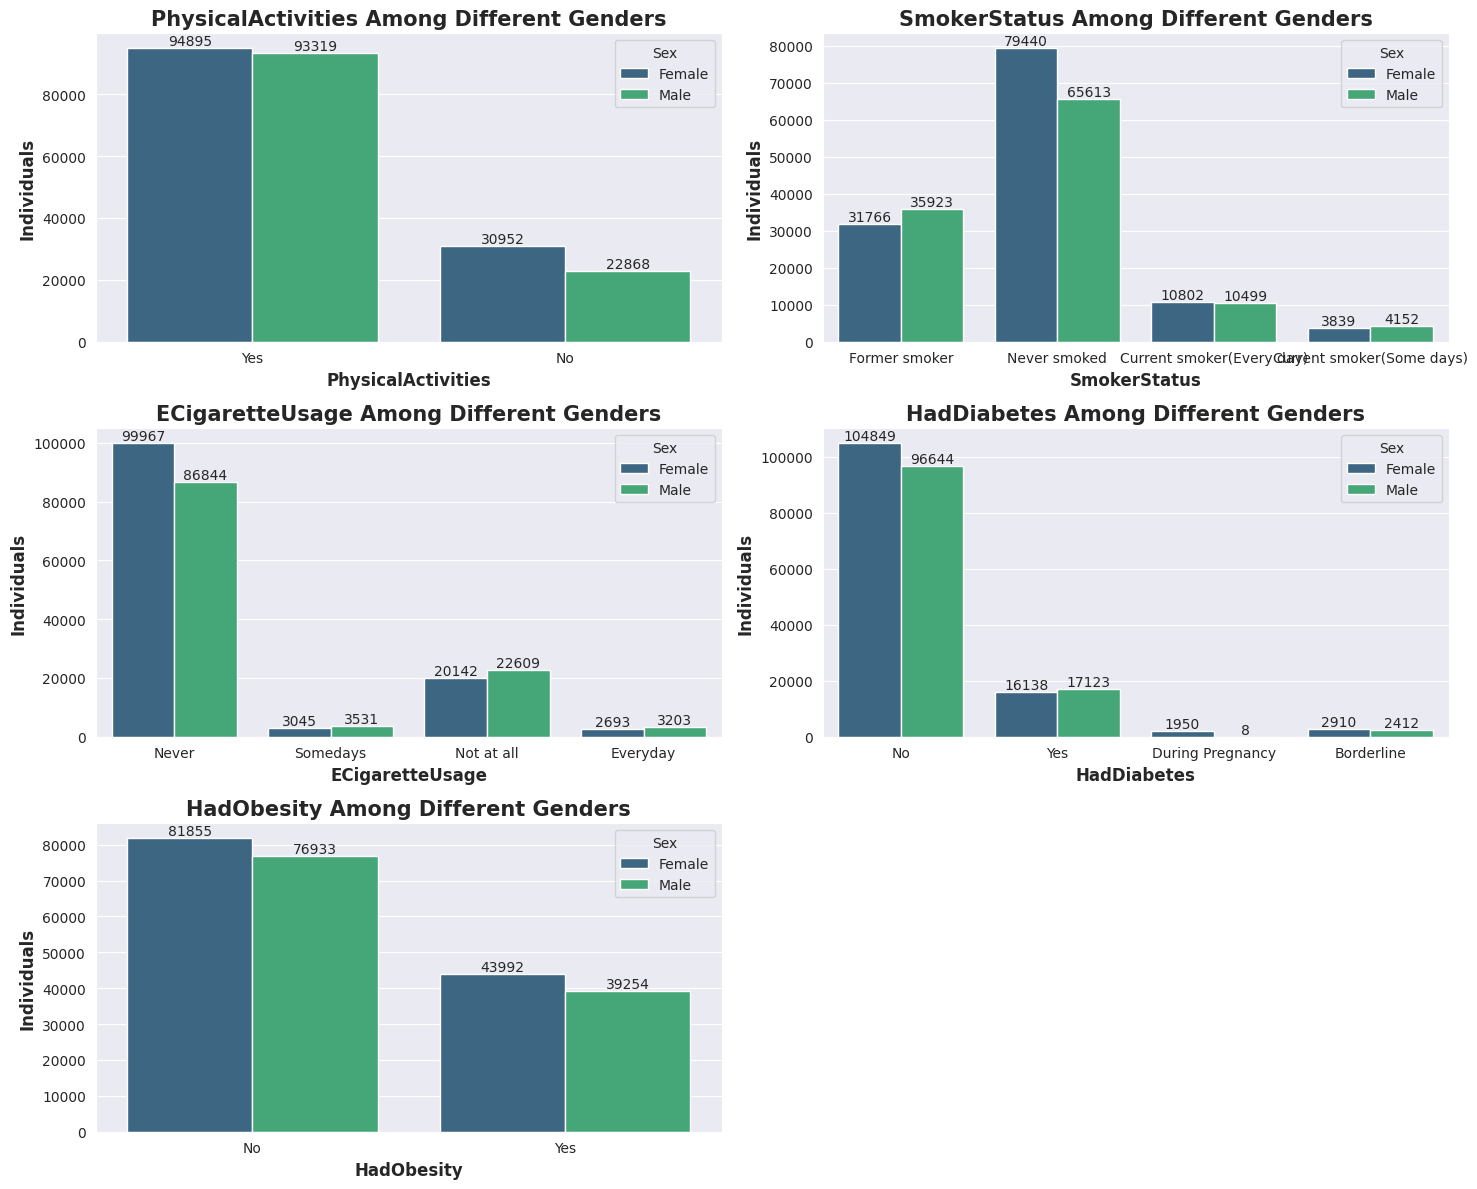

In [ ]:
risk_factors = ['PhysicalActivities', 'SmokerStatus', 'ECigaretteUsage', 'HadDiabetes', 'HadObesity']
set_size_style(15, 12, 'darkgrid')

for i, risk_factor in enumerate(risk_factors, 1):
    plt.subplot(3, 2, i)
    ax = sns.countplot(data=df, x=risk_factor, hue='Sex', palette='viridis')
    customize_plot(ax, f"{risk_factor} Among Different Genders", risk_factor, "Individuals", 15, 12)

    for c in ax.containers:
        ax.bar_label(c)
plt.tight_layout()

In [ ]:
# Function to handle outliers for a numerical column
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Replace outliers with the lower/upper limit
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])

# Iterate over numerical columns and handle outliers
for col in df.select_dtypes(include=np.number).columns:
    handle_outliers(df, col)


In [ ]:
# 1. Encoding Categorical Variables
# Perform one-hot encoding for categorical columns
df = pd.get_dummies(df, columns=['Sex', 'GeneralHealth', 'PhysicalActivities', 'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory', 'AgeCategory'])

# 2. Creating Interaction Terms (Example: Multiply 'WeightInKilograms' and 'HeightInMeters' to create a new feature)
df['BMI_interaction'] = df['WeightInKilograms'] * df['HeightInMeters']

# 3. Feature Scaling (Example: Standardize 'WeightInKilograms' and 'HeightInMeters' using Min-Max Scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['WeightInKilograms', 'HeightInMeters']] = scaler.fit_transform(df[['WeightInKilograms', 'HeightInMeters']])

# 4. Feature Transformation (Example: Log-transform 'PhysicalHealthDays' to make its distribution more Gaussian-like)
df['Log_PhysicalHealthDays'] = np.log1p(df['PhysicalHealthDays'])

In [247]:
df.columns

Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'CovidPos', 'HadObesity', 'Sex_Female', 'Sex_Male',
       'GeneralHealth_Excellent', 'GeneralHealth_Fair', 'GeneralHealth_Good',
       'GeneralHealth_Poor', 'GeneralHealth_Very good',
       'PhysicalActivities_No', 'PhysicalActivities_Yes',
       'SmokerStatus_Current smoker(Every day)',
       'SmokerStatus_Current smoker(Some days)', 'SmokerStatus_Former smoker',
       'SmokerStatus_Never smoked', 'ECigaretteUsage_Everyday',
       'ECigaretteUsage_Never', 'ECigaretteUsage_Not at all',
       'ECigaret

In [249]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd

# Assuming df contains your dataset

# Define selected features for predicting heart disease
selected_features_heart = ['BMI', 'AlcoholDrinkers', 'CovidPos',
                           'HadAngina', 'HadStroke', 'HadDiabetes',
                           'SmokerStatus_Current smoker(Every day)',
                           'SmokerStatus_Current smoker(Some days)',
                           'SmokerStatus_Former smoker',
                           'SmokerStatus_Never smoked']

X_heart = df[selected_features_heart]
y_heart = df['HadHeartAttack']

# Perform one-hot encoding on selected categorical features
X_heart_encoded = pd.get_dummies(X_heart)

# Train-Test Split
X_train_heart_encoded, X_test_heart_encoded, y_train_heart, y_test_heart = train_test_split(X_heart_encoded, y_heart, test_size=0.2, random_state=42)

# Model Training
logistic_regression_heart = LogisticRegression()
logistic_regression_heart.fit(X_train_heart_encoded, y_train_heart)

# Model Evaluation
y_pred_heart = logistic_regression_heart.predict(X_test_heart_encoded)
print("Classification Report for Heart Disease Prediction:")
print(classification_report(y_test_heart, y_pred_heart))


Classification Report for Heart Disease Prediction:
              precision    recall  f1-score   support

          No       0.96      0.99      0.97     45782
         Yes       0.55      0.19      0.28      2625

    accuracy                           0.95     48407
   macro avg       0.75      0.59      0.63     48407
weighted avg       0.93      0.95      0.94     48407



In [250]:
from sklearn.tree import DecisionTreeClassifier

# Model Training
decision_tree_heart = DecisionTreeClassifier(random_state=42)
decision_tree_heart.fit(X_train_heart_encoded, y_train_heart)

# Model Evaluation
y_pred_tree = decision_tree_heart.predict(X_test_heart_encoded)
print("Classification Report for Decision Tree:")
print(classification_report(y_test_heart, y_pred_tree))


Classification Report for Decision Tree:
              precision    recall  f1-score   support

          No       0.96      0.98      0.97     45782
         Yes       0.38      0.22      0.28      2625

    accuracy                           0.94     48407
   macro avg       0.67      0.60      0.62     48407
weighted avg       0.92      0.94      0.93     48407



In [251]:
from sklearn.ensemble import RandomForestClassifier

# Model Training
random_forest_heart = RandomForestClassifier(random_state=42)
random_forest_heart.fit(X_train_heart_encoded, y_train_heart)

# Model Evaluation
y_pred_forest = random_forest_heart.predict(X_test_heart_encoded)
print("Classification Report for Random Forest:")
print(classification_report(y_test_heart, y_pred_forest))


Classification Report for Random Forest:
              precision    recall  f1-score   support

          No       0.96      0.98      0.97     45782
         Yes       0.38      0.24      0.30      2625

    accuracy                           0.94     48407
   macro avg       0.67      0.61      0.63     48407
weighted avg       0.93      0.94      0.93     48407

